In [1]:

import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()
df.describe().T
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


False

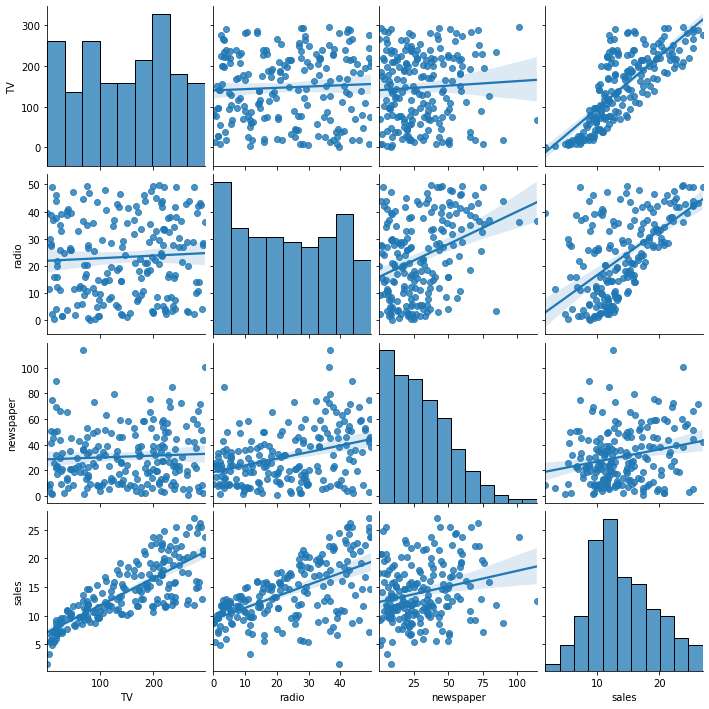

In [3]:
import seaborn as sns
sns.pairplot(df, kind="reg")

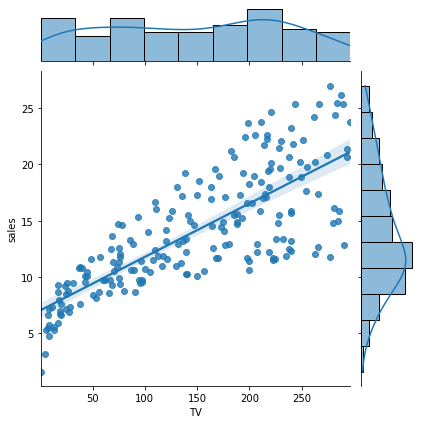

In [4]:
sns.jointplot(x="TV", y="sales", kind="reg", data=df)

In [5]:
#statsmodel

In [6]:
import statsmodels.api as sm
tv=df[["TV"]]
tv[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
tv = sm.add_constant(tv)
tv[0:5]


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [8]:
sales=df[["sales"]]
sales[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [9]:
lm = sm.OLS(sales,tv)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.47e-42
Time:                        23:37:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [11]:
#print("sales:" + str(model.params[0]) + "+TV" "*" + str(model.params[1]) )
model.params[1]

0.04753664043301977

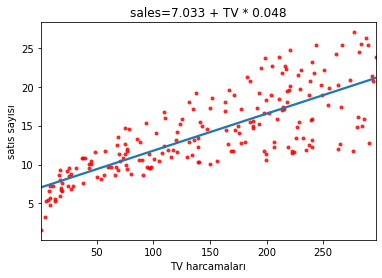

In [12]:
import seaborn as sns
g = sns.regplot( x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title('sales=' + str("%.3f"% model.params[0]) + " + TV " "* " + str("%.3f"% model.params[1]));
g.set_xlabel("TV harcamaları")
g.set_ylabel("satıs sayısı");


In [13]:
#sklearn

In [14]:
from sklearn.linear_model import LinearRegression
tv=df[["TV"]]
sales= df[["sales"]]
reg=LinearRegression()
model= reg.fit(tv,sales)
print(model.intercept_ , model.coef_)


[7.03259355] [[0.04753664]]


In [15]:
model.score(tv,sales)

0.611875050850071

In [22]:
model.predict(tv)[0:10]

array([[460.2],
       [ 89. ],
       [ 34.4],
       [303. ],
       [361.6],
       [ 17.4],
       [115. ],
       [240.4],
       [ 17.2],
       [399.6]])

In [17]:
n=df[["newspaper"]]

X=pd.DataFrame([10,5,15,100,230])
model.predict(n)[0:10]
model.predict(X)

array([[ 7.50795995],
       [ 7.27027675],
       [ 7.74564316],
       [11.78625759],
       [17.96602085]])

In [18]:
X=pd.DataFrame([10,5,15,100,230])
Y=pd.DataFrame([20,10,30,200,460])
model=reg.fit(X,Y)
model.score(X,Y)

1.0

In [19]:
X=pd.DataFrame([10,5,15,100,230])
model.predict([[200]])

array([[400.]])